In [9]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset= MNIST(root='/data',download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:05<00:00, 1.77MB/s]


Extracting /data\MNIST\raw\train-images-idx3-ubyte.gz to /data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 70.4kB/s]


Extracting /data\MNIST\raw\train-labels-idx1-ubyte.gz to /data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:03<00:00, 436kB/s] 


Extracting /data\MNIST\raw\t10k-images-idx3-ubyte.gz to /data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 599kB/s]

Extracting /data\MNIST\raw\t10k-labels-idx1-ubyte.gz to /data\MNIST\raw



In [7]:
test_dataset= MNIST(root='/data',train=False)
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

5


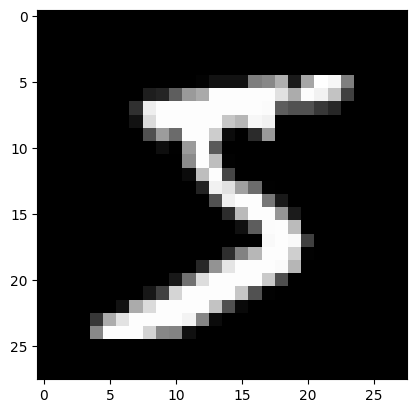

In [11]:
image,label= dataset[0]
plt.imshow(image,cmap='gray')
print(label)

In [12]:
import torchvision.transforms as transforms

In [15]:
dataset= MNIST(root='/data',
               train=True,
               transform=transforms.ToTensor())
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [16]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


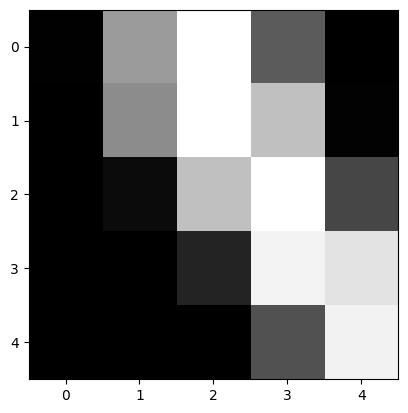

In [21]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [25]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
from torch.utils.data import DataLoader
batch_size= 128
train_loader= DataLoader(train_ds,batch_size,shuffle=True) 
val_loader= DataLoader(val_ds,batch_size,shuffle=True)


In [27]:
import torch.nn as nn
input_size=28*28
num_classes=10
model=nn.Linear(input_size,num_classes)

In [28]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0320,  0.0256,  0.0062,  ..., -0.0182, -0.0118,  0.0117],
        [-0.0176, -0.0234, -0.0259,  ...,  0.0077, -0.0303, -0.0020],
        [ 0.0105,  0.0270, -0.0036,  ...,  0.0259, -0.0276,  0.0279],
        ...,
        [-0.0245,  0.0060,  0.0102,  ...,  0.0257, -0.0302, -0.0125],
        [-0.0241,  0.0029,  0.0349,  ..., -0.0141,  0.0111, -0.0144],
        [-0.0295,  0.0281,  0.0136,  ..., -0.0023,  0.0037, -0.0149]],
       requires_grad=True)

In [33]:
image.reshape(128,784).shape

torch.Size([128, 784])

In [34]:
for image,label in train_loader:
    print(label)
    print(image.shape)
    outputs=model(image)
    break

tensor([1, 2, 8, 5, 8, 4, 0, 7, 5, 1, 0, 0, 4, 8, 0, 1, 6, 4, 6, 0, 3, 2, 2, 3,
        5, 4, 8, 4, 9, 7, 6, 5, 3, 7, 1, 3, 0, 2, 7, 8, 3, 4, 6, 2, 6, 1, 0, 9,
        6, 1, 9, 1, 3, 5, 6, 2, 1, 4, 0, 8, 2, 9, 2, 0, 4, 9, 2, 2, 4, 8, 4, 6,
        7, 7, 7, 4, 8, 9, 6, 0, 2, 5, 5, 5, 3, 1, 6, 6, 1, 1, 2, 0, 7, 6, 4, 5,
        9, 6, 8, 6, 9, 1, 6, 9, 4, 4, 7, 9, 0, 5, 0, 0, 3, 0, 1, 3, 4, 8, 1, 1,
        7, 3, 4, 9, 1, 3, 6, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [36]:
model.linear
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0141,  0.0122,  0.0296,  ...,  0.0289, -0.0117,  0.0316],
         [-0.0242,  0.0256, -0.0342,  ...,  0.0019, -0.0273,  0.0066],
         [ 0.0088, -0.0195,  0.0203,  ...,  0.0311, -0.0232,  0.0248],
         ...,
         [-0.0003,  0.0203, -0.0244,  ..., -0.0265, -0.0225, -0.0053],
         [-0.0296, -0.0303,  0.0225,  ...,  0.0157,  0.0055,  0.0263],
         [ 0.0266,  0.0292, -0.0343,  ...,  0.0238,  0.0098, -0.0264]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0074, -0.0086, -0.0325,  0.0254, -0.0090,  0.0214, -0.0017,  0.0190,
          0.0136, -0.0259], requires_grad=True)]

In [37]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.3849,  0.1641,  0.1076, -0.3446, -0.0296, -0.0165, -0.0775,  0.2755,
         -0.1588, -0.2457],
        [ 0.3353,  0.2055, -0.1314, -0.1073, -0.0454,  0.1786,  0.2379,  0.3215,
         -0.0110, -0.0766]])


In [38]:
import torch.nn.functional as F
outputs[:2]

tensor([[ 0.3849,  0.1641,  0.1076, -0.3446, -0.0296, -0.0165, -0.0775,  0.2755,
         -0.1588, -0.2457],
        [ 0.3353,  0.2055, -0.1314, -0.1073, -0.0454,  0.1786,  0.2379,  0.3215,
         -0.0110, -0.0766]], grad_fn=<SliceBackward0>)

In [39]:
probs = F.softmax(outputs, dim=1)
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 0, 0, 7, 0, 7, 4, 0, 9, 7, 5, 7, 0, 0, 7, 4, 4, 0, 7, 0, 0, 7, 0, 0,
        0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 7, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0, 4, 0, 0,
        4, 4, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 4, 7, 7, 0, 4, 4, 0, 0, 0, 0,
        7, 0, 5, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 4, 0, 7, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0,
        7, 0, 0, 5, 4, 7, 0, 7])
tensor([0.1426, 0.1258, 0.1526, 0.1623, 0.1285, 0.1681, 0.1463, 0.1545, 0.1285,
        0.1398, 0.1240, 0.1446, 0.1681, 0.1548, 0.1338, 0.1152, 0.1193, 0.1368,
        0.1566, 0.1957, 0.1491, 0.1329, 0.1231, 0.1470, 0.1503, 0.1315, 0.1430,
        0.1318, 0.1149, 0.1473, 0.1394, 0.1578, 0.1555, 0.1224, 0.1707, 0.1339,
        0.1178, 0.1419, 0.1228, 0.1392, 0.1422, 0.1247, 0.1567, 0.1216, 0.1398,
        0.1339, 0.1363, 0.1276, 0.1166, 0.1727, 0.1212, 0.1139, 0.1271, 0.1476,
        0.1215, 0.1374, 0.1214, 0.1412, 0.1389, 0.1279, 0.1246, 0.1390, 0.1446,
       

In [45]:
labels

tensor([8, 2, 2, 8, 6, 0, 2, 8, 3, 8, 6, 0, 2, 0, 7, 9, 4, 4, 3, 0, 5, 0, 1, 8,
        2, 5, 2, 5, 6, 8, 6, 5, 2, 1, 2, 0, 5, 7, 1, 5, 2, 1, 2, 1, 0, 7, 3, 4,
        4, 7, 4, 1, 1, 7, 1, 6, 1, 6, 7, 1, 5, 9, 2, 3, 0, 2, 9, 7, 2, 7, 0, 8,
        5, 2, 8, 1, 8, 7, 2, 7, 9, 1, 7, 1, 5, 3, 2, 4, 6, 0, 4, 9, 4, 0, 6, 2,
        2, 7, 2, 3, 7, 8, 0, 7, 4, 9, 7, 1, 4, 6, 1, 2, 4, 9, 5, 4, 1, 4, 6, 4,
        9, 6, 0, 2, 9, 9, 2, 4])

In [47]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [48]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] 
    
    for epoch in range(epochs):
        
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
       
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [49]:
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [50]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [51]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    
        loss = F.cross_entropy(out, labels)   
        acc = accuracy(out, labels)           
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [52]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.310645580291748, 'val_acc': 0.08198180049657822}

In [53]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9399, val_acc: 0.6145
Epoch [1], val_loss: 1.6752, val_acc: 0.7201
Epoch [2], val_loss: 1.4761, val_acc: 0.7589
Epoch [3], val_loss: 1.3253, val_acc: 0.7828
Epoch [4], val_loss: 1.2098, val_acc: 0.7955


In [54]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1162, val_acc: 0.8088
Epoch [1], val_loss: 1.0399, val_acc: 0.8191
Epoch [2], val_loss: 0.9826, val_acc: 0.8239
Epoch [3], val_loss: 0.9295, val_acc: 0.8319
Epoch [4], val_loss: 0.8895, val_acc: 0.8346


In [55]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8546, val_acc: 0.8366
Epoch [1], val_loss: 0.8227, val_acc: 0.8383
Epoch [2], val_loss: 0.7906, val_acc: 0.8431
Epoch [3], val_loss: 0.7667, val_acc: 0.8468
Epoch [4], val_loss: 0.7475, val_acc: 0.8483


In [57]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:13<00:00, 734kB/s] 


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 126kB/s]


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:02<00:00, 750kB/s] 


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 233kB/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [58]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


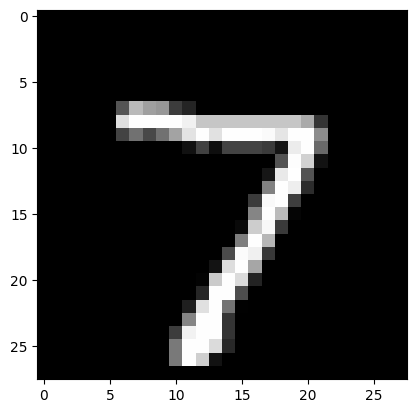

In [59]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))